# Welcome to the AMID analysis Notebook!

The next few blocks, each with very little code, allows easy analysis of AMID data (from Dal and Novonix UHPC files only, for now) with some flexibility for naming files and creating directories without the need to copy the original datafile anywhere.

The text preceeding each cell gives some information on the arguments that can be supplied to the function calls.

Reminder: to run a block press "shift+enter". All blocks with text, like this one, can be run or skipped over.

In [1]:
from amid import AMID
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### Biologic Pre-processing (Optional)

Biologic files must first be pre-processed to generate UHPC style files capable of being read by AMIDR. Please ignore this section if using UHPC files.

*path*: the location on your computer where the Biologic files are located. On Windows, if it does not start with "C:" then the directory where this notebook is located is used as base.

*form_files/d_files/c_files*: the names of the formation, discharge, and charge biologic files. Be sure to include the .mpt file extension.

*name*: The name of the cell being measured. Feel free to include information such as material and temperature.

*export_fig*: Whether or not to save figure showing complete cell activity. Default is True.

239_230507_D3,7-3,2V_C05.mpt ended prematurely. Labeling last pulse as unfinished to prevent analysis.


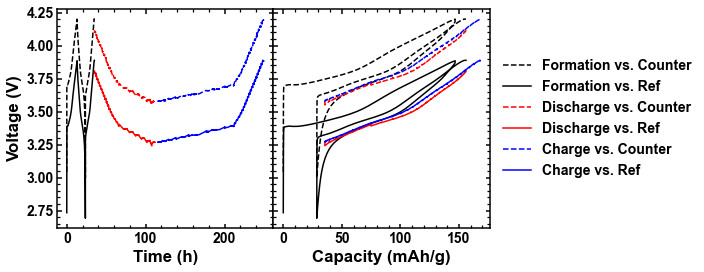

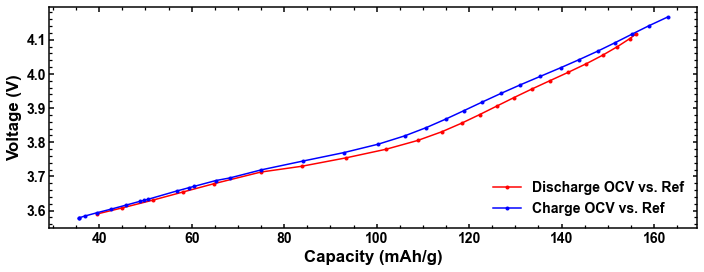

In [2]:
from amid import BIOCONVERT

path = 'C:/Users/Mitch/Lab/Atlung Modeling/Biologic Data/239'
form_files = ['239_230502_C05.mpt']
d_files = ['239_230504_D4,2-3,7V_C05.mpt', '239_230507_D3,7-3,2V_C05.mpt']
c_files = ['239_230509_C3,5-3,7V_C05.mpt', '239_230515_C3,7-4,2V_C05.mpt']
name = '239 NMC811 30C'

BIOCONVERT(path, form_files, d_files, c_files, name)

### Directory structure

*dstpath*: the location on your computer that will serve as the base directory to save things. On Windows, if it does not start with "C:" then the directory where this notebook is located is used as base.

*srcpath*: the location on your computer (or remote server if connected via VPN) where the UHPC AMID file is located.

*uhpc_file*: the name of the AMID UHPC file. Be sure to include the .csv file extension.

*cell_label*: an identifier for your analysis. If a directory \[dstpath\]\\\[cell_label\] does not exist, one is created. *cell_label* is also used when saving figures and in legends. This allows users to perform different analyses on the same AMID UHPC file without having to make new directories or copy the datafile anywhere. No matter which operating system (Win, Mac, Linux), use the "/" for separating directories - differences between operating systems are handled internally.


In [2]:
#dstpath = 'C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data'
#srcpath = 'C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data'
dstpath = 'C:/Users/Mitch/Lab/Atlung Modeling/Biologic Data/239'
srcpath = 'C:/Users/Mitch/Lab/Atlung Modeling/Biologic Data/239'
#uhpc_file = 'MAB_174_AMIDR-1_NM9505_30C_220414.csv'
#cell_label = 'MAB_174_NM9505_30C_CAPCORR'
uhpc_file = '239 NMC811 30C Charge.csv'
cell_label = '239 NMC811 30C Charge'
#uhpc_file = 'MAB.220426.196.csv'
#cell_label = 'MAB_196_LMO-L_30C_D_sp'

### The AMID object

Instantiating the AMID object is easy! The resulting variable (in this case *amid_data*) contains parsed data from the AMID protocol. You should read the output to be sure it is giving the information you expect!

In [3]:
amid_data = AMID(dstpath, srcpath, uhpc_file, cell_label, use_input_cap=True, fcap_min=0.0, single_current=True, capacitance_corr=False, force2e=False)

Working on cell: 30C
Positive electrode active mass: 0.001317 g
Input cell capacity: 0.000296 Ah
3-electrode data detected. Using working potential for calculations and complete potential for graphs and labels.
First signature curve step: 1
Last signature curve step: 99
Specific Capacity achieved in advanced protocol (signature curves): 132.54 mAh/g
Using 0.00029600 Ah to compute rates.
Starting voltage: 3.578 V
Ending voltage: 4.194 V
Found 33 charge or discharge steps in sig curve sequences.
Found 33 signature curves.
Midpoint capacities: [1.02378678e-04 6.82444150e-01 2.71771195e+00 5.56027838e+00
 8.69555894e+00 1.17679996e+01 1.36592606e+01 1.45368300e+01
 1.80654375e+01 2.25740112e+01 2.45109777e+01 2.73567000e+01
 3.11850956e+01 3.61247265e+01 4.39840454e+01 5.29123623e+01
 6.10754898e+01 6.76253358e+01 7.28462550e+01 7.72883805e+01
 8.13505163e+01 8.53011750e+01 8.93120964e+01 9.34458807e+01
 9.77212968e+01 1.02083619e+02 1.06279318e+02 1.10286404e+02
 1.14156944e+02 1.17835803

### Make some plots!

You can now make the standard plots. For each plotting method, figures are saved by default. If you would prefer to not have them saved automatically, you can pass *save=False*. e.g. amid_data.plot_protocol(save=False). All figures get saved in the directory \[*dstpath*\]\\\[*cell_label*\].

NOTE: in this particular example, there is an OCV step after the discharge step preceeding the signature curves.

*ylims*: an optional argument to fix y-axis plot bounds. A list with the min and max values for the y-axis bounds. e.g., ylims=[2.95, 4.35].

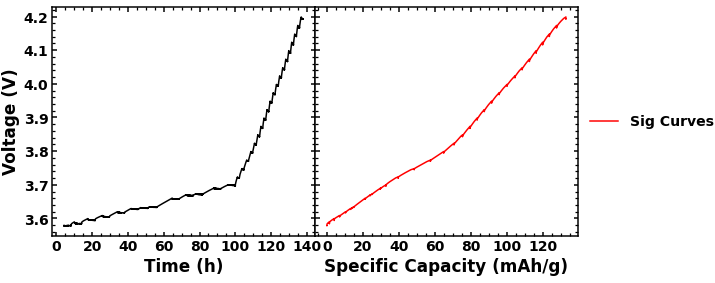

In [4]:
amid_data.plot_protocol()

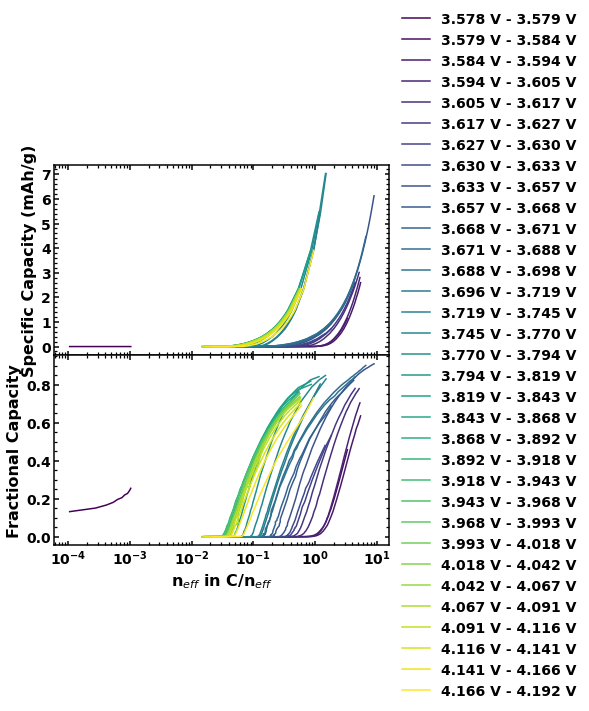

In [5]:
amid_data.plot_caps()

### It's time to fit the data! 
You must pass the *PARTICLE RADIUS IN CM* to the *fit_atlung()* method. In this example, $r=0.5\ \mu$m is passed.

Optional arguments:

*ftol (current default fitting algorithm does not use this parameter)*: the tolerance criteria for the fits. If fits are poor, try making smaller. If a RuntimeWarning is raised, try making larger. You may still get a good fit despite a RuntimeWarning being raised. Defaults to 5e-14. 

*r_corr*: R correction factor. Innacessible capacity due to resistance can be mistaken for innacessible capacity due to diffusion transport and cause diffusivity to be underestimated. Including this correction factor will differentiate between the source of inaccesible capacity and return both diffusivity and resistance values.  Default is False.

*D_bounds*: bounds for $D_c$. Needs to be a list with the lower and upper bound.

*shape*: particle geometry. Currently supports "sphere" and "plane". Defaults to "sphere".

*nalpha*: the number of expansion coefficients to use in the Atlung expression. Default to 150.

*nQ* : the number of Q values (on a log scale) to use in the theorical Atlung curve, $\tau$ vs $Q$, for comparing fit quality. Default is 2000. There is normally no reason to change this.

*export_fig*: whether or not to save figures comparing theory to fitted values for each voltage interval. Default is True.

*export_data*: whether or not to save $D_c$ values of each voltage interval. Includes $R_{eff}$ and $dq/dV$ if corr is True. Default is True.

*label*: an additional label that be used for saving figures and data. For example, perhaps one wishes to use different particle sizes, then "label=r1" and "label=r2" could be used in 2 separate calls to fit_atlung() and each set of plots would be saved to same directory but each with their corresponding label.

In [9]:
radius = 1.461e-4 #Zhenhua NM9505
#radius = 0.517e-4 #LMO-S
#radius = 6.078e-4 #LMO-S sp
#radius = 3.053e-4 #LMO-M
#radius = 7.329e-4 #LMO-M sp
#radius = 4.162e-4 #LMO-L 
#radius = 6.983e-4 #LMO-L sp
label = 'WRONG r'
#amid_data.insert_rate_cap('C:/Users/Mitch/Lab/Atlung Modeling/RC Parallel Model/167 3.556V/167 3.556V 0.01dqdV surface layer input.csv')
#radius = 0.2e-4
fit_data = amid_data.fit_atlung(radius, r_corr=True, tracer_inputs = [275.5, 30, 303.15], D_bounds=[1e-17, 1e-8], D_guess=1.0e-11, 
                                 maxfcap_bounds=[0.95, 1.5], maxfcap_guess=1.0, R_eff_bounds=[1e-6, 1e1], R_eff_guess=1e-2, label=label)

Opt params: [Log(D), fCapAdj, log(Reff), Log(Reff/D)]
3.578 V - 3.579 V Opt params: [-9.37412096  1.         -6.          3.37412096]
3.579 V - 3.584 V Opt params: [-12.55493443   1.0000001   -1.42918304  11.12575139]
3.584 V - 3.594 V Opt params: [-12.4828775    1.0000001   -1.26747179  11.21540572]
3.594 V - 3.605 V Opt params: [-12.34470292   1.0000001   -1.15346667  11.19123625]
3.605 V - 3.617 V Opt params: [-12.19145484   1.0000001   -1.26384853  10.9276063 ]
3.617 V - 3.627 V Opt params: [-12.05427184   1.          -1.22365355  10.83061829]
3.627 V - 3.630 V Opt params: [-11.96572868   1.          -1.21269993  10.75302875]
3.630 V - 3.633 V Opt params: [-11.89276218   1.          -1.18092713  10.71183506]
3.633 V - 3.657 V Opt params: [-11.78456813   1.          -1.16862158  10.61594655]
3.657 V - 3.668 V Opt params: [-11.67468921   1.          -1.18959629  10.48509292]
3.668 V - 3.671 V Opt params: [-11.58949904   1.          -1.14778683  10.44171221]
3.671 V - 3.688 V Opt para

### Make the summary graph!

Need to pass the returned values from fit_atlung() to this method as the first argument.

Optional arguments: 

*label*: An additional label to saving the figure in case multiple of these are to be generated. If passed, the same label as when calling fit_atlung() should be used. Default is None.

*export_fig*: whether or not to save the figure. Default is True.

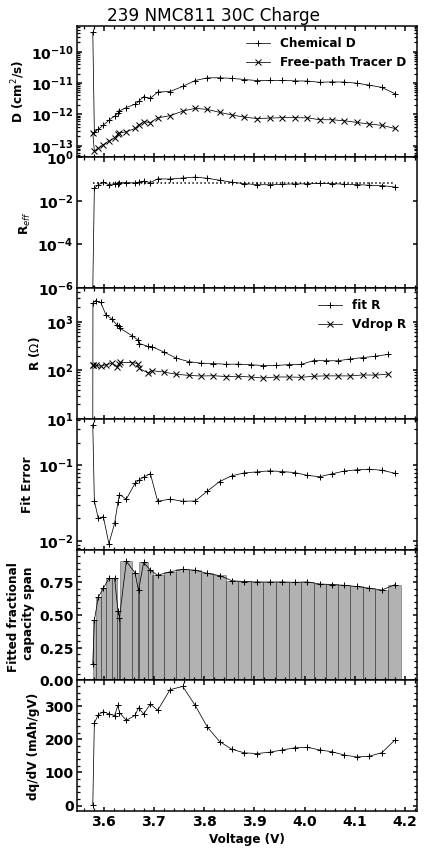

In [10]:
amid_data.make_summary_graph(fit_data, label=label)